In [1]:
import numpy as np
np.set_printoptions(suppress=True)

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets

__–ó–∞–¥–∞–Ω–∏–µ 1.__ –°–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å –¥–∞—Ç–∞—Å–µ—Ç –ø—Ä–∏ –ø–æ–º–æ—â–∏ sklearn.datasets.make_regression –∏ –æ–±—É—á–∏—Ç—å –ª–∏–Ω–µ–π–Ω—É—é –º–æ–¥–µ–ª—å –ø—Ä–∏ –ø–æ–º–æ—â–∏ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ –∏ —Å—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–æ–≥–æ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞. –ù–∞–Ω–µ—Å—Ç–∏ —Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω—É—é –æ—à–∏–±–∫—É –¥–ª—è –æ–±–æ–∏—Ö –º–µ—Ç–æ–¥–æ–≤ –Ω–∞ –æ–¥–∏–Ω –≥—Ä–∞—Ñ–∏–∫, —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥—ã –æ —Ä–∞–∑–Ω–∏—Ü–µ —Å–∫–æ—Ä–æ—Å—Ç–∏ —Å—Ö–æ–¥–∏–º–æ—Å—Ç–∏ –∫–∞–∂–¥–æ–≥–æ –∏–∑ –º–µ—Ç–æ–¥–æ–≤.

In [2]:
bias = 20

X, y, coef = datasets.make_regression(n_samples=10000, n_features=1, n_informative=1, bias=bias,
                                      n_targets=1, noise=40, coef=True, random_state=42)

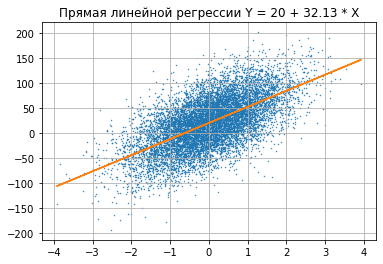

In [3]:
plt.scatter(X, y, s=0.2)
plt.plot(X, bias + coef * X, color='C1')
plt.title(f'–ü—Ä—è–º–∞—è –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ Y = {bias} + {coef:.2f} * X')
plt.grid()

In [4]:
X = np.hstack((np.ones((X.shape[0], 1)), X)) # –¥–æ–±–∞–≤–∏–º –µ–¥–∏–Ω–∏—á–Ω—ã–π —Å—Ç–æ–ª–±–µ—Ü –∫ –¥–∞–Ω–Ω—ã–º

In [5]:
def calc_std_feat(x: np.array): # —Ñ—É–Ω–∫—Ü–∏—è —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏–∏ –¥–∞–Ω–Ω—ã—Ö
    return (x - x.mean()) / x.std()

In [6]:
for i in range(1, X.shape[1]):
    X[:, i] = calc_std_feat(X[:, i])

In [7]:
X.mean(axis=0), X.std(axis=0)

(array([ 1., -0.]), array([0., 1.]))

In [8]:
def calc_mse(y, y_pred): # —Ñ—É–Ω–∫—Ü–∏—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è —Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–æ–π –æ—à–∏–±–∫–∏
    return np.mean(np.square(y - y_pred))

In [9]:
calc_mse(y, bias + coef * X[:, 1])

1608.9080329572653

In [10]:
def gradient_descent(X, y, alpha, iters, tol):
    
    w = np.random.randn(X.shape[1]) # –Ω–∞—á–∞–ª—å–Ω—ã–µ –≤–µ—Å–∞
    err_hist, w_hist = [], [w]

    for i in range(int(iters)):
        y_pred = np.dot(X, w)
        
        err = calc_mse(y, y_pred)
        err_hist.append(err)
        
        w = w - 2 * alpha * np.dot(X.T, (y_pred - y)) / X.shape[0]
        w_hist.append(w)

        if i > 2 and np.linalg.norm(w - w_hist[-2], ord=2) < tol:
            break
        
    return w, w_hist, err_hist

In [11]:
def stochastic_gradient_descent(X, y, alpha, iters, tol, n): # n - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –≤ –±–∞—Ç—á–µ
    
    w = np.random.randn(X.shape[1]) # –Ω–∞—á–∞–ª—å–Ω—ã–µ –≤–µ—Å–∞
    err_hist, w_hist = [], [w]

    for i in range(int(iters)):
        y_pred = np.dot(X, w)
        
        err = calc_mse(y, y_pred)
        err_hist.append(err)

        b = np.random.randint(X.shape[0], size=n) # –≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º –±–∞—Ç—á –∏–∑ n —ç–ª–µ–º–µ–Ω—Ç–æ–≤

        w = w - 2 * alpha * np.dot(X[b].T, (np.dot(X[b], w) - y[b])) / X.shape[0]

        w_hist.append(w)

        if i > 2 and np.linalg.norm(w - w_hist[-2], ord=2) < tol:
            break
        
    return w, w_hist, err_hist

In [12]:
def plot(w_hist, err_hist, s_w_hist, s_err_hist, xlim):
    
    fig = plt.figure(figsize=(18, 8))
    
    plt.subplot(131)
    plt.title('$MSE$')
    plt.plot(err_hist, linewidth=2, color='C3')
    plt.plot(s_err_hist, linewidth=2, color='C2')
    plt.legend(('–ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫', '–°—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–∏–π –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫'), loc='best')
    plt.xlim(xlim[0], xlim[1])
    plt.xlabel('$iterations$')
    plt.ylabel('$MSE$')
    plt.grid()

    plt.subplot(132)
    plt.title('–í–µ—Å–∞: –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫')
    plt.plot(w_hist, linewidth=2)
    plt.legend([f'$w_{i}$' for i in range(len(w_hist[0]))], loc='best')
    plt.xlabel('$iterations$')
    plt.ylabel('$w$')
    plt.grid()
    
    plt.subplot(133)
    plt.title('–í–µ—Å–∞: —Å—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–∏–π –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫')
    plt.plot(s_w_hist, linewidth=2)
    plt.legend([f'$w_{i}$' for i in range(len(w_hist[0]))], loc='best')
    plt.xlabel('$iterations$')
    plt.ylabel('$w$')
    plt.grid()

In [13]:
def execute(alpha, iters, tol, n, xlim): # xlim - –æ–±—Ä–µ–∑–∫–∞ –≥—Ä–∞—Ñ–∏–∫–∞ MSE –¥–ª—è –Ω–∞–≥–ª—è–¥–Ω–æ—Å—Ç–∏
    
    w, w_hist, err_hist = gradient_descent(X, y, alpha=alpha, iters=iters, tol=tol)
    s_w, s_w_hist, s_err_hist = stochastic_gradient_descent(X, y, alpha=alpha, iters=iters, tol=tol, n=n)
    
    print(f'–ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π = {len(err_hist)}, MSE = {err_hist[-1]:.2f}, \
{[f"w{i} = {w_hist[-1][i]:.2f}" for i in range(len(w_hist[0]))]}')
    
    print(f'–°—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–∏–π –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π = {len(s_err_hist)}, MSE = {s_err_hist[-1]:.2f}, \
{[f"w{i} = {s_w_hist[-1][i]:.2f}" for i in range(len(s_w_hist[0]))]}')
    
    plot(w_hist, err_hist, s_w_hist, s_err_hist, xlim)   

–ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π = 62, MSE = 1608.32, ['w0 = 20.46', 'w1 = 31.51']
–°—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–∏–π –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π = 10000, MSE = 1608.49, ['w0 = 20.59', 'w1 = 31.90']
Wall time: 6.5 s


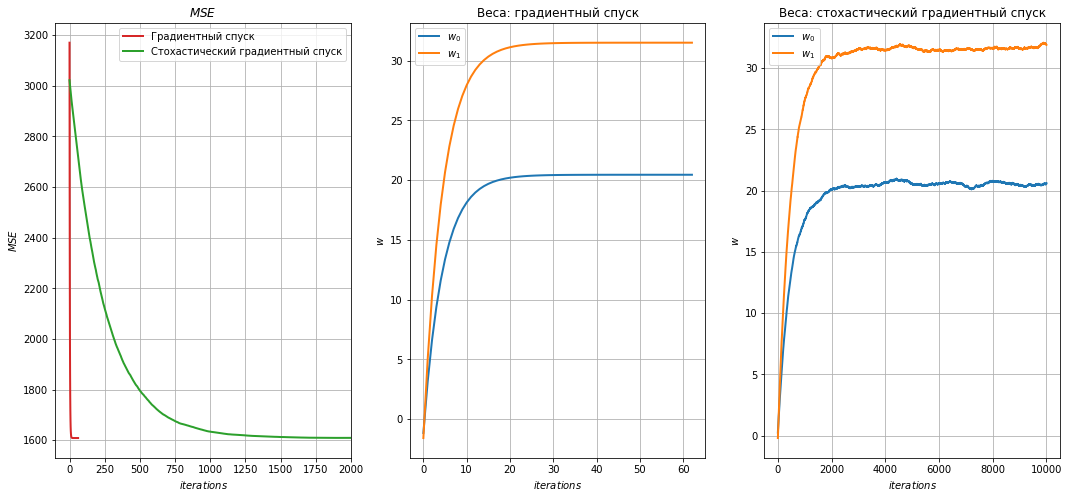

In [14]:
%%time

execute(alpha=0.1, iters=1e4, tol=1e-5, n=100, xlim=[-100, 2000])

–û–±–∞ –º–µ—Ç–æ–¥–∞ –ø–æ–∫–∞–∑–∞–ª–∏ —Ö–æ—Ä–æ—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ä–∞—Å—á–µ—Ç–∞ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏, –æ–¥–Ω–∞–∫–æ –º–µ—Ç–æ–¥ –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–æ–≥–æ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞ –Ω–∞ –¥–∞–Ω–Ω–æ–π –ø—Ä–æ—Å—Ç–æ–π –º–æ–¥–µ–ª–∏ —Ä–∞–±–æ—Ç–∞–µ—Ç —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–µ–µ. –ï–º—É –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –æ–∫–æ–ª–æ 60 –∏—Ç–µ—Ä–∞—Ü–∏–π –¥–ª—è –¥–æ—Å—Ç–∏–∂–µ–Ω–∏—è –∑–∞–¥–∞–Ω–Ω–æ–π —Ç–æ—á–Ω–æ—Å—Ç–∏, –∞ –∫ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞–º —Ä–µ–≥—Ä–µ—Å—Å–∏–∏, –±–ª–∏–∑–∫–∏–º –∫ –∑–∞–¥–∞–Ω–Ω—ã–º, –æ–Ω –ø—Ä–∏–±–ª–∏–∂–∞–µ—Ç—Å—è –Ω–∞ 20 –∏—Ç–µ—Ä–∞—Ü–∏–∏, –ø—Ä–∏ —Ç–æ–º, —á—Ç–æ –∞–ª–≥–æ—Ä–∏—Ç–º —Å—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–æ–≥–æ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞, –µ—Å—Ç–µ—Å—Ç–≤–µ–Ω–Ω–æ, –ø—Ä–æ—Ö–æ–¥–∏—Ç –ø–æ –≤—Å–µ–º –∏—Ç–µ—Ä–∞—Ü–∏—è–º –¥–æ –∫–æ–Ω—Ü–∞, –∞ –±–ª–∏–∑–∫–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –¥–æ—Å—Ç–∏–≥–∞–µ—Ç —Ç–æ–ª—å–∫–æ –∫ 2000 –∏—Ç–µ—Ä–∞—Ü–∏–∏.

–¢–∞–∫–∂–µ –∞–ª–≥–æ—Ä–∏—Ç–º —Å—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–æ–≥–æ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞ —Å–∏–ª—å–Ω–æ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —Å–∫–æ—Ä–æ—Å—Ç–∏ –æ–±—É—á–µ–Ω–∏—è –∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –≤ –±–∞—Ç—á–µ:

–ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π = 1046, MSE = 1608.32, ['w0 = 20.46', 'w1 = 31.51']
–°—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–∏–π –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π = 10000, MSE = 1787.56, ['w0 = 13.85', 'w1 = 19.86']
Wall time: 9.64 s


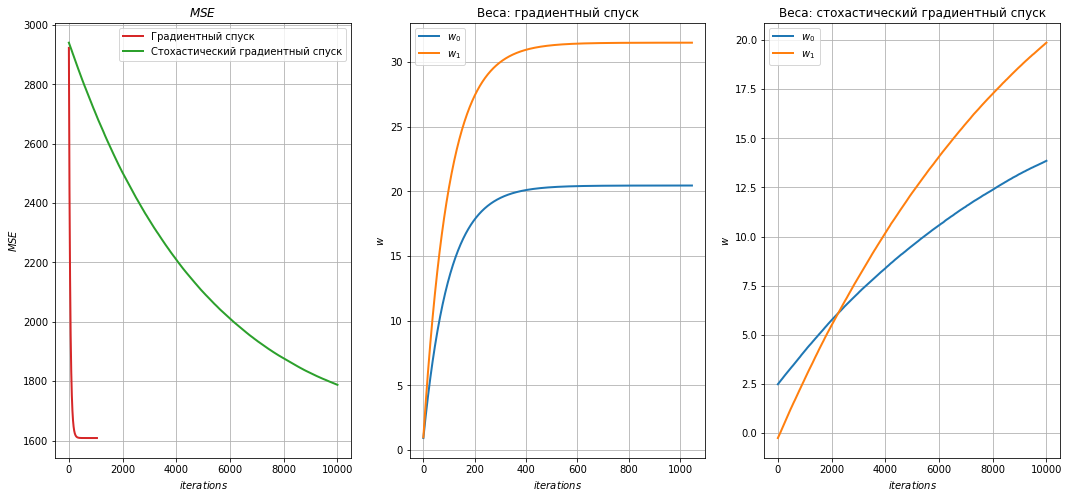

In [15]:
%%time

execute(alpha=0.005, iters=1e4, tol=1e-5, n=100, xlim=[None, None]) # alpha = 0.005

–ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π = 62, MSE = 1608.32, ['w0 = 20.46', 'w1 = 31.51']
–°—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–∏–π –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π = 10000, MSE = 1632.21, ['w0 = 17.90', 'w1 = 27.35']
Wall time: 8.13 s


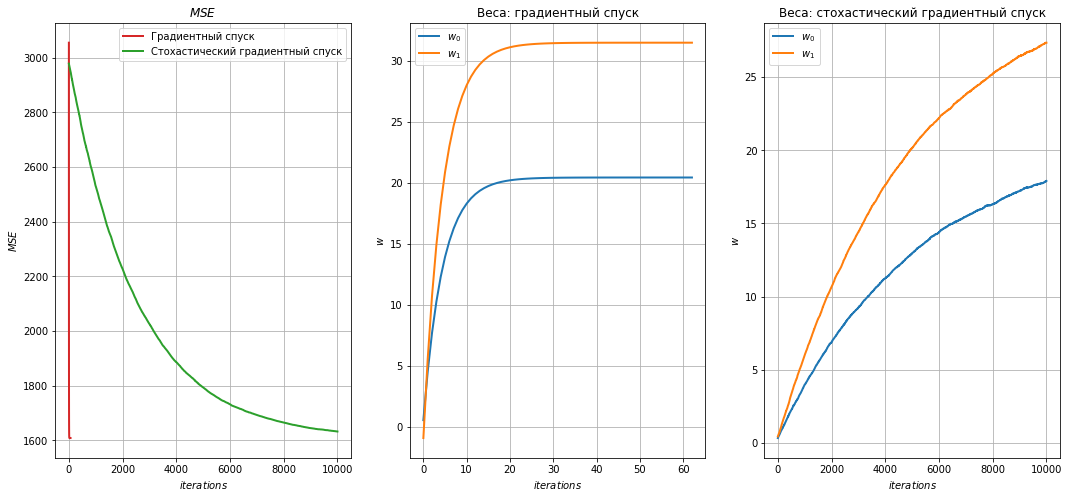

In [16]:
%%time

execute(alpha=0.1, iters=1e4, tol=1e-5, n=10, xlim=[None, None]) # n = 10

__–ó–∞–¥–∞–Ω–∏–µ 2.__ –ú–æ–¥–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞—Ç—å —Ä–µ—à–µ–Ω–∏–µ –ø–µ—Ä–≤–æ–≥–æ –∑–∞–¥–∞–Ω–∏—è –ø—É—Ç–µ–º –¥–æ–±–∞–≤–ª–µ–Ω–∏—è ùêø2 -—Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏ –∏ —Å—Ä–∞–≤–Ω–∏—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã.

In [17]:
def calc_mse_l2(y, y_pred, lambda_, w): # —Ñ—É–Ω–∫—Ü–∏—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è —Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–æ–π –æ—à–∏–±–∫–∏ —Å L2 —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–µ–π
    return np.mean(np.square(y - y_pred)) + lambda_ * np.sum(np.square(w))

In [18]:
def gradient_descent_l2(X, y, alpha, iters, tol, lambda_):
    
    w = np.random.randn(X.shape[1]) # –Ω–∞—á–∞–ª—å–Ω—ã–µ –≤–µ—Å–∞
    err_hist, w_hist = [], [w]

    for i in range(int(iters)):
        y_pred = np.dot(X, w)
        
        err = calc_mse_l2(y, y_pred, lambda_, w)
        err_hist.append(err)
        
        w = w - 2 * alpha * np.dot(X.T, (y_pred - y)) / X.shape[0] - 2 * lambda_ * np.sum(w)
        w_hist.append(w)

        if i > 2 and np.linalg.norm(w - w_hist[-2], ord=2) < tol:
            break
        
    return w, w_hist, err_hist

In [19]:
def stochastic_gradient_descent_l2(X, y, alpha, iters, tol, n, lambda_): # n - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –≤ –±–∞—Ç—á–µ
    
    w = np.random.randn(X.shape[1]) # –Ω–∞—á–∞–ª—å–Ω—ã–µ –≤–µ—Å–∞
    err_hist, w_hist = [], [w]

    for i in range(int(iters)):
        y_pred = np.dot(X, w)
        
        err = calc_mse_l2(y, y_pred, lambda_, w)
        err_hist.append(err)

        b = np.random.randint(X.shape[0], size=n) # –≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º –±–∞—Ç—á –∏–∑ n —ç–ª–µ–º–µ–Ω—Ç–æ–≤

        w = w - 2 * alpha * np.dot(X[b].T, (np.dot(X[b], w) - y[b])) / X.shape[0] - 2 * lambda_ * np.sum(w)

        w_hist.append(w)

        if i > 2 and np.linalg.norm(w - w_hist[-2], ord=2) < tol:
            break
        
    return w, w_hist, err_hist

In [20]:
def execute_l2(alpha, iters, tol, n, lambda_, xlim): # xlim - –æ–±—Ä–µ–∑–∫–∞ –≥—Ä–∞—Ñ–∏–∫–∞ MSE –¥–ª—è –Ω–∞–≥–ª—è–¥–Ω–æ—Å—Ç–∏
    
    w, w_hist, err_hist = gradient_descent_l2(X, y, alpha=alpha, iters=iters, tol=tol, lambda_=lambda_)
    s_w, s_w_hist, s_err_hist = stochastic_gradient_descent_l2(X, y, alpha=alpha, iters=iters, tol=tol, n=n, lambda_=lambda_)
    
    print(f'–ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π = {len(err_hist)}, MSE = {err_hist[-1]:.2f}, \
{[f"w{i} = {w_hist[-1][i]:.2f}" for i in range(len(w_hist[0]))]}')
    
    print(f'–°—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–∏–π –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π = {len(s_err_hist)}, MSE = {s_err_hist[-1]:.2f}, \
{[f"w{i} = {s_w_hist[-1][i]:.2f}" for i in range(len(s_w_hist[0]))]}')
    
    plot(w_hist, err_hist, s_w_hist, s_err_hist, xlim)   

–ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π = 62, MSE = 1608.33, ['w0 = 20.45', 'w1 = 31.50']
–°—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–∏–π –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π = 10000, MSE = 1608.94, ['w0 = 19.85', 'w1 = 31.02']
Wall time: 8.21 s


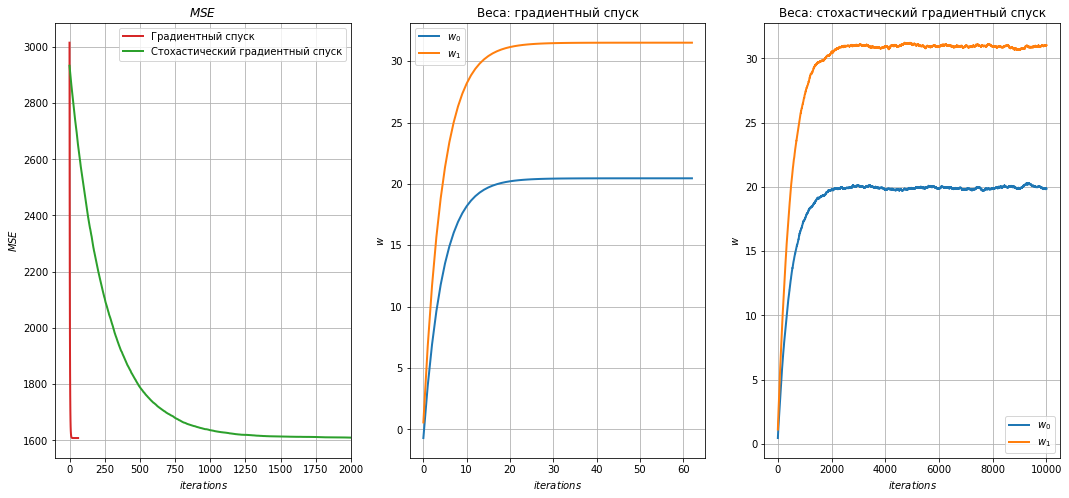

In [21]:
%%time

execute_l2(alpha=0.1, iters=1e4, tol=1e-5, n=100, lambda_=1e-5, xlim=[-100, 2000])

–†–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è –Ω–µ –¥–æ–±–∞–≤–∏–ª–∞ —Ç–æ—á–Ω–æ—Å—Ç–∏ –∫ –¥–∞–Ω–Ω–æ–π –ø—Ä–æ—Å—Ç–æ–π –º–æ–¥–µ–ª–∏ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏, –æ–¥–Ω–∞–∫–æ –Ω–µ–º–Ω–æ–≥–æ —É–≤–µ–ª–∏—á–∏–ª–∞ –≤—Ä–µ–º—è –ø–æ–¥—Å—á–µ—Ç–∞ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤, —Ç.–∫. –¥–æ–±–∞–≤–∏–ª–∞ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã—á–∏—Å–ª–µ–Ω–∏–π.

–ü—Ä–∏ —ç—Ç–æ–º, –ø—Ä–∏ —É–≤–µ–ª–∏—á–µ–Ω–∏–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ $\lambda$ –∞–ª–≥–æ—Ä–∏—Ç–º —Å—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–æ–≥–æ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞ –≤—ã–¥–∞–µ—Ç –Ω–µ–∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:

–ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π = 61, MSE = 1610.20, ['w0 = 19.95', 'w1 = 31.00']
–°—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–∏–π –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π = 10000, MSE = 2203.92, ['w0 = 3.12', 'w1 = 14.36']
Wall time: 8.46 s


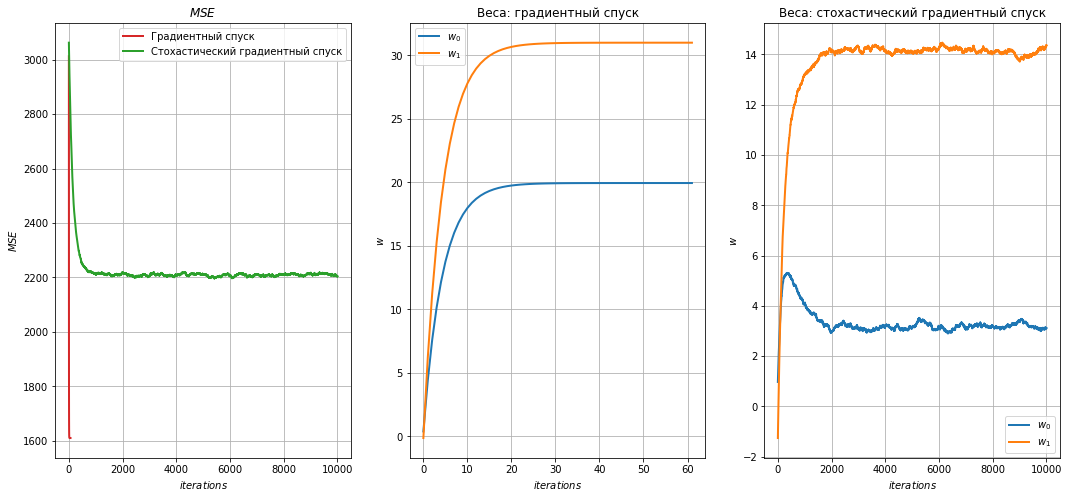

In [22]:
%%time

execute_l2(alpha=0.1, iters=1e4, tol=1e-5, n=100, lambda_=1e-3, xlim=[None, None]) # lambda_=1e-3

__–ó–∞–¥–∞–Ω–∏–µ 3 (–æ–ø—Ü–∏—è).__ –ú–æ–¥–µ—Ä–Ω–∏–∑–∏—Ä–æ–≤–∞—Ç—å —Ä–µ—à–µ–Ω–∏–µ –∑–∞–¥–∞–Ω–∏—è 2, –∑–∞–º–µ–Ω–∏–≤ L2 —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—é –Ω–∞ L1 —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—é.

In [23]:
def calc_mse_l1(y, y_pred, lambda_, w): # —Ñ—É–Ω–∫—Ü–∏—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è —Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–æ–π –æ—à–∏–±–∫–∏ —Å L1 —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–µ–π
    return np.mean(np.square(y - y_pred)) + lambda_ * np.sum(np.abs(w))

In [24]:
def gradient_descent_l1(X, y, alpha, iters, tol, lambda_):
    
    w = np.random.randn(X.shape[1]) # –Ω–∞—á–∞–ª—å–Ω—ã–µ –≤–µ—Å–∞
    err_hist, w_hist = [], [w]

    for i in range(int(iters)):
        y_pred = np.dot(X, w)
        
        err = calc_mse_l1(y, y_pred, lambda_, w)
        err_hist.append(err)
        
        w = w - 2 * alpha * np.dot(X.T, (y_pred - y)) / X.shape[0] - lambda_ * np.sum(w) / np.sum(np.abs(w))
        w_hist.append(w)

        if i > 2 and np.linalg.norm(w - w_hist[-2], ord=2) < tol:
            break
        
    return w, w_hist, err_hist

In [25]:
def stochastic_gradient_descent_l1(X, y, alpha, iters, tol, n, lambda_): # n - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –≤ –±–∞—Ç—á–µ
    
    w = np.random.randn(X.shape[1]) # –Ω–∞—á–∞–ª—å–Ω—ã–µ –≤–µ—Å–∞
    err_hist, w_hist = [], [w]

    for i in range(int(iters)):
        y_pred = np.dot(X, w)
        
        err = calc_mse_l1(y, y_pred, lambda_, w)
        err_hist.append(err)

        b = np.random.randint(X.shape[0], size=n) # –≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º –±–∞—Ç—á –∏–∑ n —ç–ª–µ–º–µ–Ω—Ç–æ–≤

        w = w - 2 * alpha * np.dot(X[b].T, (np.dot(X[b], w) - y[b])) / X.shape[0] - lambda_ * np.sum(w) / np.sum(np.abs(w))

        w_hist.append(w)

        if i > 2 and np.linalg.norm(w - w_hist[-2], ord=2) < tol:
            break
        
    return w, w_hist, err_hist

In [26]:
def execute_l1(alpha, iters, tol, n, lambda_, xlim): # xlim - –æ–±—Ä–µ–∑–∫–∞ –≥—Ä–∞—Ñ–∏–∫–∞ MSE –¥–ª—è –Ω–∞–≥–ª—è–¥–Ω–æ—Å—Ç–∏
    
    w, w_hist, err_hist = gradient_descent_l2(X, y, alpha=alpha, iters=iters, tol=tol, lambda_=lambda_)
    s_w, s_w_hist, s_err_hist = stochastic_gradient_descent_l2(X, y, alpha=alpha, iters=iters, tol=tol, n=n, lambda_=lambda_)
    
    print(f'–ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π = {len(err_hist)}, MSE = {err_hist[-1]:.2f}, \
{[f"w{i} = {w_hist[-1][i]:.2f}" for i in range(len(w_hist[0]))]}')
    
    print(f'–°—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–∏–π –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π = {len(s_err_hist)}, MSE = {s_err_hist[-1]:.2f}, \
{[f"w{i} = {s_w_hist[-1][i]:.2f}" for i in range(len(s_w_hist[0]))]}')
    
    plot(w_hist, err_hist, s_w_hist, s_err_hist, xlim)   

–ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π = 62, MSE = 1608.33, ['w0 = 20.45', 'w1 = 31.50']
–°—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–∏–π –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π = 10000, MSE = 1608.90, ['w0 = 19.92', 'w1 = 30.98']
Wall time: 8 s


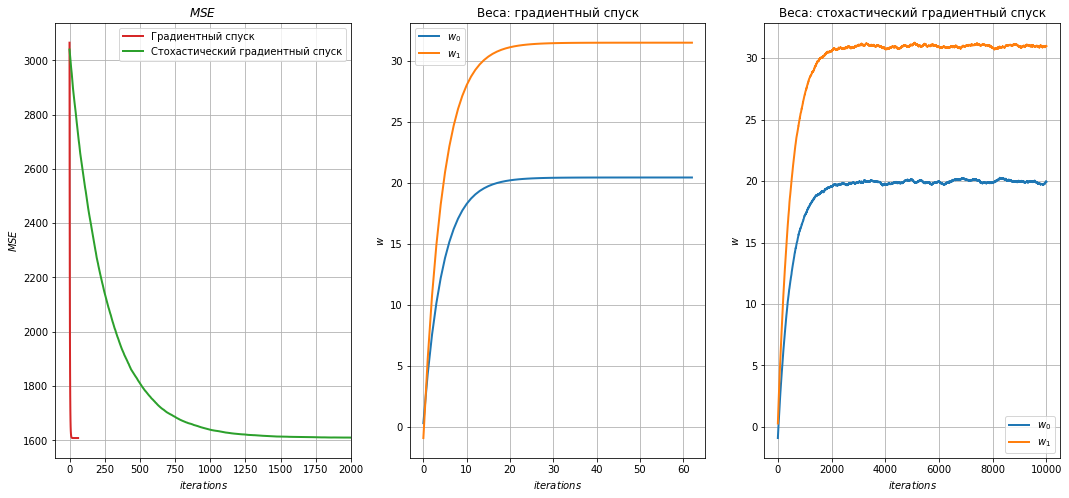

In [27]:
%%time

execute_l2(alpha=0.1, iters=1e4, tol=1e-5, n=100, lambda_=1e-5, xlim=[-100, 2000])

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ —Å $L_1$-—Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–µ–π –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –Ω–µ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è –æ—Ç –º–æ–¥–µ–ª–∏ —Å $L_2$-—Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–µ–π.

–ö–∞–∫ –∏ –≤ —Å–ª—É—á–∞–µ —Å $L_2$-—Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–µ–π, –ø—Ä–∏ —É–≤–µ–ª–∏—á–µ–Ω–∏–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ $\lambda$ –∞–ª–≥–æ—Ä–∏—Ç–º —Å—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–æ–≥–æ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞ –≤–µ–¥–µ—Ç —Å–µ–±—è –ø–æ—Ö–æ–∂–∏–º –æ–±—Ä–∞–∑–æ–º:

–ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π = 61, MSE = 1610.20, ['w0 = 19.95', 'w1 = 31.00']
–°—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–∏–π –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π = 10000, MSE = 2213.46, ['w0 = 3.03', 'w1 = 14.15']
Wall time: 8.36 s


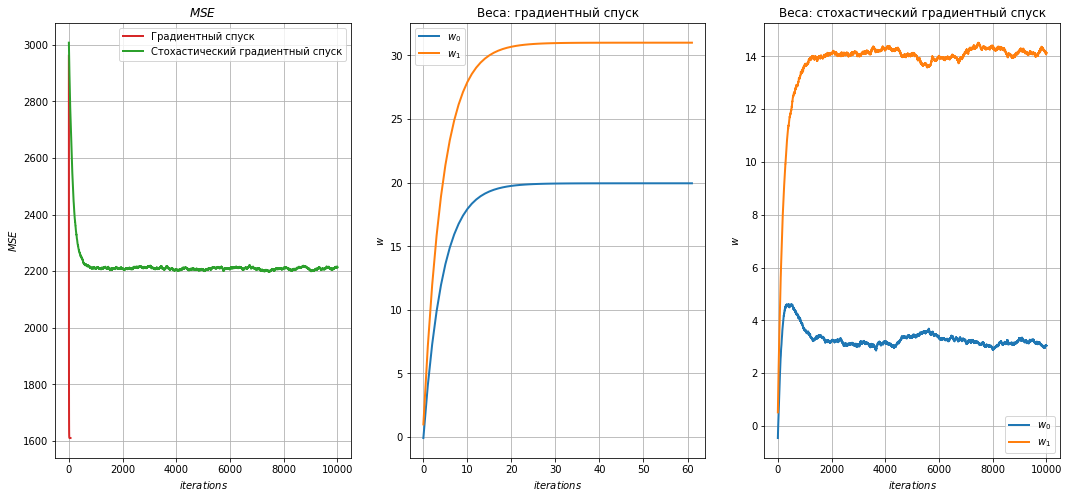

In [28]:
%%time

execute_l1(alpha=0.1, iters=1e4, tol=1e-5, n=100, lambda_=1e-3, xlim=[None, None]) # lambda_=1e-3